# Image Classifier Project Tutorial

## Image classification system

In [1]:
import tensorflow as tf

2024-05-05 08:49:31.183724: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 08:49:33.329232: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 08:49:39.670159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 08:49:53.727475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


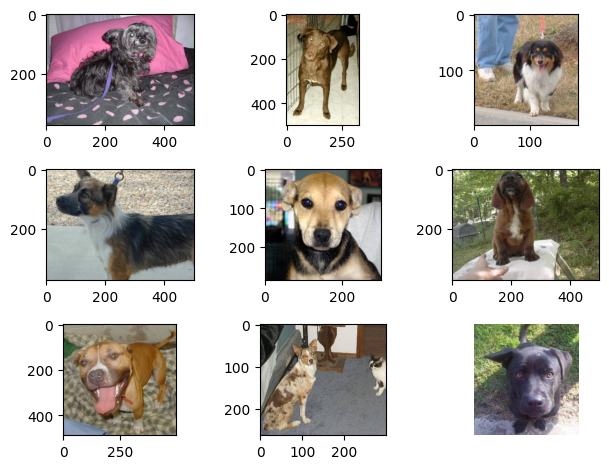

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# plotting the dog photos
folder ='/workspaces/machine-learning-deep-learning/data/raw/train/dogs/'
# plotting first few images
for i in range(9):
	plt.subplot(3, 3, i + 1)
	filename = folder + 'dog.' + str(i) + '.jpg'
	image = imread(filename)
	plt.imshow(image)

plt.axis('off')
plt.tight_layout()

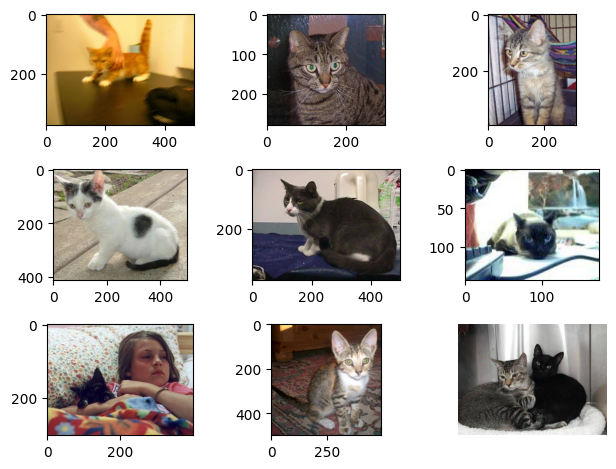

In [3]:
# plotting the dog photos
folder = '/workspaces/machine-learning-deep-learning/data/raw/train/cats/'
# plotting first few images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)

plt.axis('off')
plt.tight_layout()

In [4]:
train_dir= "/workspaces/machine-learning-deep-learning/data/raw/train/"
test_dir= "/workspaces/machine-learning-deep-learning/data/raw/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Setting up data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#Setting up iterators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode = "binary")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode = "binary")

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 1, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-05 08:55:14.646243: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-05 08:55:15.096872: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-05 08:55:15.152399: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.


In [6]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [7]:
#Model training
history=model.fit(train_generator, epochs=1)
print(history.history['accuracy'])
print(history.history['loss'])

/home/vscode/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2024-05-05 08:55:30.238826: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-05 08:55:34.055066: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 204800000 exceeds 10% of free system memo

 584/1250 ━━━━━━━━━━━━━━━━━━━━ 3:48:53 21s/step - accuracy: 0.4961 - loss: 0.7352

: 

*As shown in the message above, it has not been possible to run the training.

In [ ]:
#Optimizing the model

from keras.callbacks import ModelCheckpoint, EarlyStopping

# Defining the paths to save the model checkpoints
checkpoint_path = "/workspaces/machine-learning-deep-learning/models/model_checkpoint.h5"

# Defining the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss', 
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

# Defining the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, 
                               restore_best_weights=True)

model.fit_generator(train_generator,
                    epochs=100,
                    validation_data=test_generator,
                    callbacks=[checkpoint, early_stopping])


In [ ]:
# Checking the Accuracy of the Data

# Plotting the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()

In [ ]:
#Making predictions

from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

def prediction():
    img = load_img('/workspaces/machine-learning-deep-learning/data/raw/test/test_set/13.jpg', target_size=(200, 200))
    plt.imshow(img)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    model = load_model('/workspaces/machine-learning-deep-learning/models/model_checkpoint.h5')
    
    result = model.predict(img_array)
    
    if result[0] < 0.5:
        print('Cat')
    else:
        print('Dog')